In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import cv2
import os
import tensorflow as tf
from glob import glob
from tqdm import tqdm
import time

In [30]:
height = 1024//4
width = 1280//4

In [31]:
# dataset_path = './'
model_path = './model/unet_jacc.keras'
save_path = './save'

In [32]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [33]:
create_dir(save_path)

In [34]:
import tensorflow as tf

# Define the custom loss function
def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=-1)
    sum_ = tf.keras.backend.sum(tf.keras.backend.abs(y_true) + tf.keras.backend.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

# Load the model with custom loss function
model = tf.keras.models.load_model(model_path, custom_objects={'jaccard_distance': jaccard_distance})

# Display model summary
model.summary()


Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 320, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 320, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

In [35]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 320, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 320, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

In [8]:
# test_x = glob(os.path.join(dataset_path, 'frames', '*'))

In [10]:
time_taken = []
# for x in tqdm(test_x):
name = img_path.split('/')[-1]

x = cv2.imread(img_path, cv2.IMREAD_COLOR)
x = cv2.resize(x, (width, height))
x = x/255.0
x = np.expand_dims(x, axis=0)

start_time = time.time()
p = model.predict(x)[0]
total_time = time.time() - start_time
time_taken.append(total_time)
# p = p>0.5
p = p*255
print(p.shape)
cv2.imwrite('./save/img.png', p)
    # plt.imsave('mask.jpg', p)
    # break

1/1 [==============================] - 12s 12s/step
(256, 320, 1)


True

In [11]:

def predict_mask(x):
    # time_taken = []
    # for x in tqdm(test_x):
    name = img_path.split('/')[-1]
    
    x = cv2.imread(img_path, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (width, height))
    x = x/255.0
    x = np.expand_dims(x, axis=0)
    
    # start_time = time.time()
    p = model.predict(x)[0]
    return p


In [12]:
mean_time = np.mean(time_taken)
mean_fps = 1/mean_time

In [13]:
print(f'Mean Time: {mean_time: 1.5f} - Mean FPS: {mean_fps: 2.5f}')

Mean Time:  11.79530 - Mean FPS:  0.08478


In [14]:
import tensorflow as tf

def intersection_over_union(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float64)  # Threshold predictions
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) - intersection
    iou = tf.reduce_mean((intersection + 1e-7) / (union + 1e-7))  # Add epsilon to avoid division by zero
    
    return 1 - iou  # Loss is 1 - IoU

def jaccard_index(y_true, y_pred):
    y_true = cv2.imread(y_true, 0)
    y_true = cv2.resize(y_true, (320, 256))
    #y_pred = cv2.imread(y_pred,0)
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float64)  # Threshold predictions
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2, 3]) - intersection
    jaccard = tf.reduce_mean((intersection + 1e-7) / (union + 1e-7))  # Add epsilon to avoid division by zero
    
    return (1 - jaccard)  # Loss is 1 - Jaccard Index


In [37]:
import os
train_path = './train/'

files_dir = os.path.join('files')
model_file = os.path.join('./model/', 'unet.h5')
log_file = os.path.join('./log/', 'log.csv')

In [38]:
X = glob(os.path.join(train_path, 'frames', '*'))
y = glob(os.path.join(train_path, 'labels_1', '*'))

In [40]:
import cv2
import tensorflow as tf

def jaccard_index(y_true_path, y_pred):
    y_true = cv2.imread(y_true_path)
    y_pred = tf.image.resize(y_pred, (y_true.shape[0], y_true.shape[1]))

    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(tf.greater(y_pred, 0.5), tf.float64)  
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2]) - intersection
    jaccard = tf.reduce_mean((intersection + 1e-7) / (union + 1e-7))  
    
    return jaccard 

In [28]:
_list = []
for idx, x in enumerate(X):
    # print(x)
    # print(cv2.imread(y[idx]).shape)
    y_predicted = predict_mask(y[idx])
    # print(y_predicted.shape)
    _list.append(jaccard_index(y[idx],y_predicted))
    # break
print(sum(_list)/len(_list))

1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: 

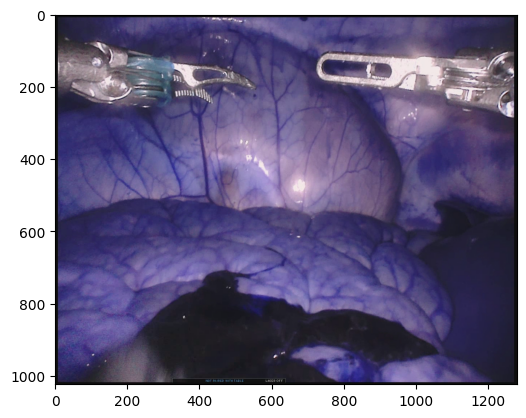

In [41]:
img_path = './train/frames/frame000_seq_14.png'
img = cv2.imread(img_path)
plt.imshow(img)

1/1 [==============================] - 0s 24ms/step


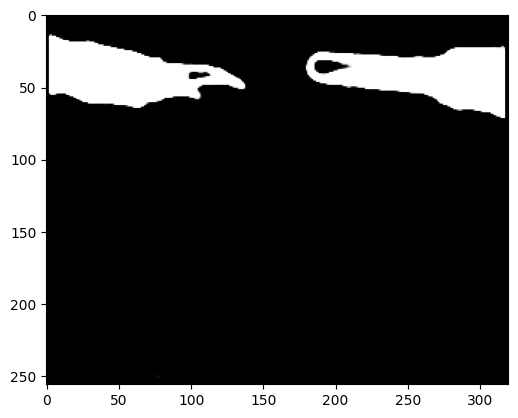

In [43]:
mask = predict_mask(img_path)
plt.imshow(mask, 'gray')

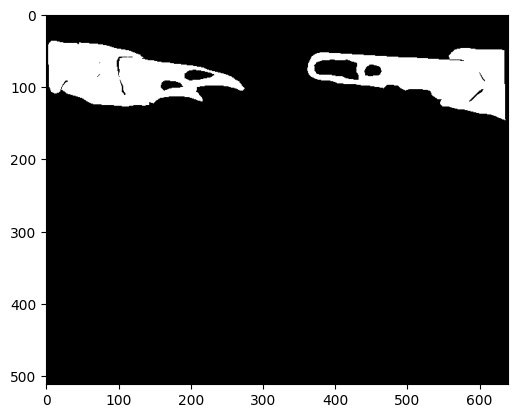

In [47]:
actual_mask = './train/labels_1/frame000_seq_14.png'
plt.imshow(cv2.imread(actual_mask))